<a href="https://colab.research.google.com/github/Bruleurs/Python_for_data_analysis/blob/master/TD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 4.1MB/s 
     |████████████████████████████████| 14.8MB 299kB/s 
     |████████████████████████████████| 10.9MB 45.2MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
map_df = gpd.read_file("departements-20140306-50m.shp")
map_df.head()

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ..."


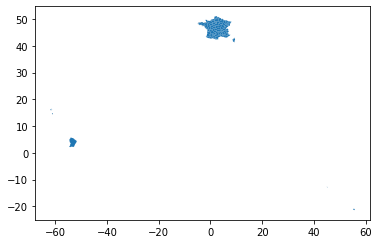

In [ ]:
import matplotlib as plt
%matplotlib inline 
map_df.plot()

In [ ]:
map_df = map_df[map_df.code_insee.str.contains("\d\d\d")==False]

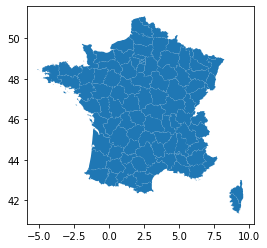

In [ ]:
map_df.plot()

In [ ]:
import pandas as pd
prenoms = pd.read_csv("dpt2019.csv",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


In [ ]:
dpt_sum=prenoms.groupby("dpt").nombre.sum()
dpt_sum

dpt
01      440132
02      845825
03      500158
04      106020
05      126691
        ...   
971     643111
972     639827
973     174634
974    1201566
XX     8465506
Name: nombre, Length: 100, dtype: int64

In [ ]:
type(dpt_sum)

pandas.core.series.Series

In [ ]:
dpt_sum=dpt_sum.reset_index()
dpt_sum

,dpt,nombre
0,01,440132
1,02,845825
2,03,500158
3,04,106020
4,05,126691
...,...,...
95,971,643111
96,972,639827
97,973,174634
98,974,1201566


In [ ]:
type(dpt_sum)

pandas.core.frame.DataFrame

In [ ]:
dpt_sum["code_insee"]=dpt_sum.dpt
dpt_sum

,dpt,nombre,code_insee
0,01,440132,01
1,02,845825,02
2,03,500158,03
3,04,106020,04
4,05,126691,05
...,...,...,...
95,971,643111,971
96,972,639827,972
97,973,174634,973
98,974,1201566,974


In [ ]:
merged = map_df.merge(dpt_sum, on='code_insee')
merged.head()
merged

,code_insee,nom,nuts3,wikipedia,geometry,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",01,440132
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",02,845825
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",03,500158
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",04,106020
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",05,126691
...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",91,582907
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",92,1174101
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,993947
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,821258


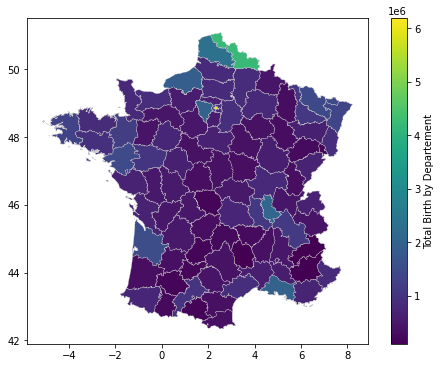

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 6))

merged.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Total Birth by Departement"})

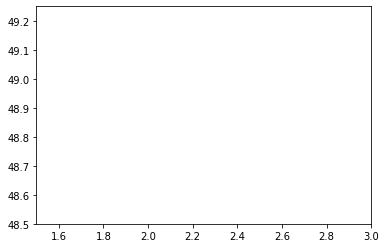

In [ ]:
plt.axis([1.5,3,48.5,49.25])

merged.plot(column="nombre", ax=ax , linewidth=0.3, edgecolor="0.5", legend=True, legend_kwds
            ={"label": "Population by Country"})



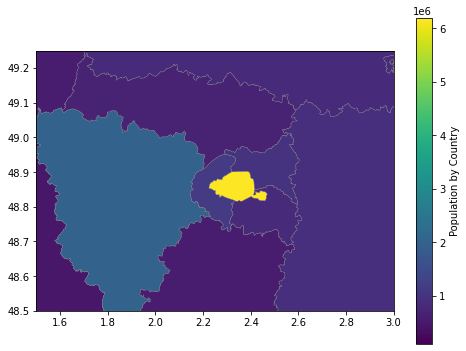

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))
plt.axis([1.5,3,48.5,49.25])

merged.plot(column="nombre", ax=ax , linewidth=0.3, edgecolor="0.5", legend=True, legend_kwds
            ={"label": "Population by Country"})

3. EXERCICES :
Display a choropleth map with Boys/girls total births disparity

The same but weighted by total dpt population

Display a choropleth map with number of girls named Emma born in 2018

The same but weighted by total dpt population ( for instance nb of Emma births per thousand of population in the dpt )

to do this you must find a file with 2018 population for every dpt. the file must contain a department column with the same data as the prenoms dpt column...

SUPERBONUS

choropleth map for the most innovant departements , population weighted what is innovation ?

choropleth map for the most trendsetting departements , population weighted what is trendsetting ? we could detect firstname that appear (or come again..) in one or a few departments only, and then grows in other departments.

In [ ]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3676677,2,ZYA,2018,59,3
3676678,2,ZYA,XXXX,XX,252
3676679,2,ZYNA,2013,93,3
3676680,2,ZYNA,XXXX,XX,54


In [ ]:
boys_pourcent=prenoms[prenoms.sexe ==1].groupby("dpt").nombre.sum()

In [ ]:
boys_pourcent

dpt
01      223592
02      430054
03      254648
04       55387
05       65511
        ...   
971     339474
972     334396
973      94663
974     617721
XX     3779609
Name: nombre, Length: 100, dtype: int64

In [ ]:
dpt_sum

,dpt,nombre,code_insee
0,01,440132,01
1,02,845825,02
2,03,500158,03
3,04,106020,04
4,05,126691,05
...,...,...,...
95,971,643111,971
96,972,639827,972
97,973,174634,973
98,974,1201566,974


In [ ]:
boys_pourcent=boys_pourcent.reset_index()

In [ ]:
boys_pourcent=boys_pourcent.merge(dpt_sum,on="dpt")

In [ ]:
boys_pourcent["pourcent"] = boys_pourcent.nombre_x/boys_pourcent.nombre_y*100
boys_pourcent

,dpt,nombre_x,nombre_y,code_insee,pourcent
0,01,223592,440132,01,50.801123
1,02,430054,845825,02,50.844324
2,03,254648,500158,03,50.913511
3,04,55387,106020,04,52.242030
4,05,65511,126691,05,51.709277
...,...,...,...,...,...
95,971,339474,643111,971,52.786222
96,972,334396,639827,972,52.263502
97,973,94663,174634,973,54.206512
98,974,617721,1201566,974,51.409660


In [ ]:
merged_boys = map_df.merge(boys_pourcent, on='code_insee')
merged_boys.head()
merged_boys

,code_insee,nom,nuts3,wikipedia,geometry,dpt,nombre_x,nombre_y,pourcent
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",01,223592,440132,50.801123
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",02,430054,845825,50.844324
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",03,254648,500158,50.913511
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",04,55387,106020,52.242030
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",05,65511,126691,51.709277
...,...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",91,303485,582907,52.064051
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",92,607741,1174101,51.762242
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,515173,993947,51.831033
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,425272,821258,51.782996


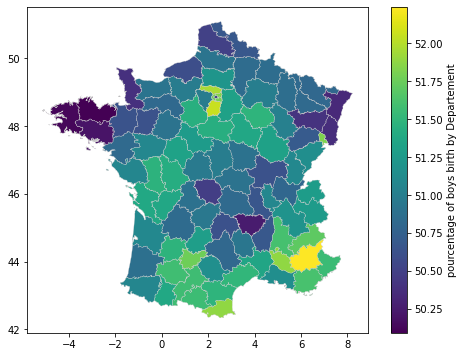

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_boys.plot(column="pourcent",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "pourcentage of boys birth by Departement"})

In [ ]:
pop_by_dep = pd.read_csv("Departements.csv",sep=";")
pop_by_dep=pop_by_dep.drop(["NBARR","NBCAN","NBCOM","PMUN","Unnamed: 7"],axis=1)
pop_by_dep

,CODDEP,DEP,PTOT
0,01,Ain,659180
1,02,Aisne,546527
2,03,Allier,347035
3,04,Alpes-de-Haute-Provence,168381
4,05,Hautes-Alpes,145883
...,...,...,...
95,95,Val-d'Oise,1239262
96,971,Guadeloupe,396153
97,972,Martinique,377711
98,973,Guyane,271124


In [ ]:
pop_by_dep["code_insee"] = pop_by_dep.CODDEP
pop_by_dep

,CODDEP,DEP,PTOT,code_insee
0,01,Ain,659180,01
1,02,Aisne,546527,02
2,03,Allier,347035,03
3,04,Alpes-de-Haute-Provence,168381,04
4,05,Hautes-Alpes,145883,05
...,...,...,...,...
95,95,Val-d'Oise,1239262,95
96,971,Guadeloupe,396153,971
97,972,Martinique,377711,972
98,973,Guyane,271124,973


In [ ]:
pop_by_dep=pop_by_dep.merge(boys_pourcent,on="code_insee")

pop_by_dep

,CODDEP,DEP,PTOT,code_insee,dpt,nombre_x,nombre_y,pourcent
0,01,Ain,659180,01,01,223592,440132,50.801123
1,02,Aisne,546527,02,02,430054,845825,50.844324
2,03,Allier,347035,03,03,254648,500158,50.913511
3,04,Alpes-de-Haute-Provence,168381,04,04,55387,106020,52.242030
4,05,Hautes-Alpes,145883,05,05,65511,126691,51.709277
...,...,...,...,...,...,...,...,...
93,95,Val-d'Oise,1239262,95,95,357437,687871,51.962795
94,971,Guadeloupe,396153,971,971,339474,643111,52.786222
95,972,Martinique,377711,972,972,334396,639827,52.263502
96,973,Guyane,271124,973,973,94663,174634,54.206512


In [ ]:
pop_by_dep["pourcent_weigh"]=pop_by_dep.pourcent * pop_by_dep.PTOT /pop_by_dep.PTOT.min()

In [ ]:
pop_by_dep=pop_by_dep.drop(["nombre_x","nombre_y","DEP"],axis=1)

In [ ]:
pop_by_dep

,CODDEP,PTOT,code_insee,dpt,pourcent,pourcent_weigh
0,01,659180,01,01,50.801123,417.336546
1,02,546527,02,02,50.844324,346.308520
2,03,347035,03,03,50.913511,220.199033
3,04,168381,04,04,52.242030,109.628181
4,05,145883,05,05,51.709277,94.011770
...,...,...,...,...,...,...
93,95,1239262,95,95,51.962795,802.536362
94,971,396153,971,971,52.786222,260.610920
95,972,377711,972,972,52.263502,246.018193
96,973,271124,973,973,54.206512,183.159102


In [ ]:
merged_boys_weight = map_df.merge(pop_by_dep, on='code_insee')
merged_boys_weight.head()
merged_boys_weight

,code_insee,nom,nuts3,wikipedia,geometry,CODDEP,PTOT,dpt,pourcent,pourcent_weigh
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",01,659180,01,50.801123,417.336546
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",02,546527,02,50.844324,346.308520
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",03,347035,03,50.913511,220.199033
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",04,168381,04,52.242030,109.628181
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",05,145883,05,51.709277,94.011770
...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",91,1310599,91,52.064051,850.387508
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",92,1625917,92,51.762242,1048.867262
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,1630133,93,51.831033,1052.984518
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,1397035,94,51.782996,901.578493


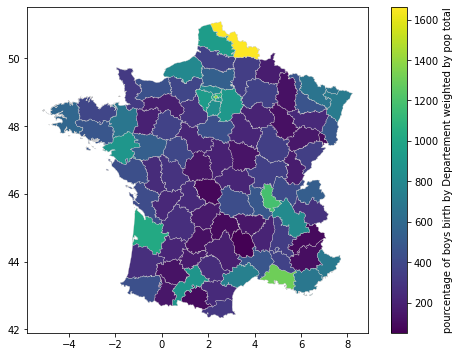

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_boys_weight.plot(column="pourcent_weigh",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "pourcentage of boys birth by Departement weighted by pop total"})

In [ ]:
Emma_df = prenoms[(prenoms.preusuel=="EMMA") & (prenoms.annais == "2018")]
Emma_df

,sexe,preusuel,annais,dpt,nombre
2343695,2,EMMA,2018,01,37
2343696,2,EMMA,2018,02,38
2343697,2,EMMA,2018,03,28
2343698,2,EMMA,2018,04,6
2343699,2,EMMA,2018,05,10
...,...,...,...,...,...
2343788,2,EMMA,2018,95,79
2343789,2,EMMA,2018,971,17
2343790,2,EMMA,2018,972,11
2343791,2,EMMA,2018,973,11


In [ ]:
Emma_df["code_insee"]=Emma_df.dpt

merged_emma = map_df.merge(Emma_df, on='code_insee')
merged_emma.head()
merged_emma

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,code_insee,nom,nuts3,wikipedia,geometry,sexe,preusuel,annais,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",2,EMMA,2018,01,37
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",2,EMMA,2018,02,38
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",2,EMMA,2018,03,28
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",2,EMMA,2018,04,6
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",2,EMMA,2018,05,10
...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",2,EMMA,2018,91,75
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",2,EMMA,2018,92,142
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2,EMMA,2018,93,48
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2,EMMA,2018,94,102


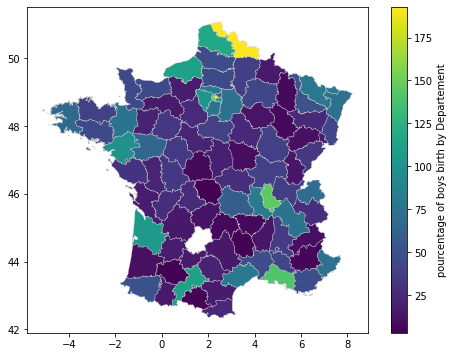

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_emma.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "pourcentage of boys birth by Departement"})

In [ ]:
poptot_by_dep = pd.read_csv("Departements.csv",sep=";")
poptot_by_dep=poptot_by_dep.drop(["NBARR","NBCAN","NBCOM","PMUN","Unnamed: 7"],axis=1)
poptot_by_dep["code_insee"] = poptot_by_dep.CODDEP
poptot_by_dep

,CODDEP,DEP,PTOT,code_insee
0,01,Ain,659180,01
1,02,Aisne,546527,02
2,03,Allier,347035,03
3,04,Alpes-de-Haute-Provence,168381,04
4,05,Hautes-Alpes,145883,05
...,...,...,...,...
95,95,Val-d'Oise,1239262,95
96,971,Guadeloupe,396153,971
97,972,Martinique,377711,972
98,973,Guyane,271124,973


In [ ]:
emma_weight = Emma_df

In [ ]:
emma_weight = emma_weight.merge(poptot_by_dep,on="code_insee")
emma_weight

,sexe,preusuel,annais,dpt,nombre,code_insee,CODDEP,DEP,PTOT
0,2,EMMA,2018,01,37,01,01,Ain,659180
1,2,EMMA,2018,02,38,02,02,Aisne,546527
2,2,EMMA,2018,03,28,03,03,Allier,347035
3,2,EMMA,2018,04,6,04,04,Alpes-de-Haute-Provence,168381
4,2,EMMA,2018,05,10,05,05,Hautes-Alpes,145883
...,...,...,...,...,...,...,...,...,...
92,2,EMMA,2018,95,79,95,95,Val-d'Oise,1239262
93,2,EMMA,2018,971,17,971,971,Guadeloupe,396153
94,2,EMMA,2018,972,11,972,972,Martinique,377711
95,2,EMMA,2018,973,11,973,973,Guyane,271124


In [ ]:
emma_weight["nombre_weight"] = emma_weight.nombre * emma_weight.PTOT /emma_weight.PTOT.min()
emma_weight

,sexe,preusuel,annais,dpt,nombre,code_insee,CODDEP,DEP,PTOT,nombre_weight
0,2,EMMA,2018,01,37,01,01,Ain,659180,303.958873
1,2,EMMA,2018,02,38,02,02,Aisne,546527,258.823853
2,2,EMMA,2018,03,28,03,03,Allier,347035,121.098953
3,2,EMMA,2018,04,6,04,04,Alpes-de-Haute-Provence,168381,12.590803
4,2,EMMA,2018,05,10,05,05,Hautes-Alpes,145883,18.180833
...,...,...,...,...,...,...,...,...,...,...
92,2,EMMA,2018,95,79,95,95,Val-d'Oise,1239262,1220.110892
93,2,EMMA,2018,971,17,971,971,Guadeloupe,396153,83.930720
94,2,EMMA,2018,972,11,972,972,Martinique,377711,51.779923
95,2,EMMA,2018,973,11,973,973,Guyane,271124,37.168046


In [ ]:
merged_emma_weight = map_df.merge(emma_weight, on='code_insee')
merged_emma_weight.head()
merged_emma_weight

,code_insee,nom,nuts3,wikipedia,geometry,sexe,preusuel,annais,dpt,nombre,CODDEP,DEP,PTOT,nombre_weight
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ...",2,EMMA,2018,01,37,01,Ain,659180,303.958873
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ...",2,EMMA,2018,02,38,02,Aisne,546527,258.823853
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38407 46.33112, ...",2,EMMA,2018,03,28,03,Allier,347035,121.098953
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ...",2,EMMA,2018,04,6,04,Alpes-de-Haute-Provence,168381,12.590803
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24411 44.44693, ...",2,EMMA,2018,05,10,05,Hautes-Alpes,145883,18.180833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39427 48.33263, ...",2,EMMA,2018,91,75,91,Essonne,1310599,1225.011528
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31588 48.76670, ...",2,EMMA,2018,92,142,92,Hauts-de-Seine,1625917,2877.370563
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2,EMMA,2018,93,48,93,Seine-Saint-Denis,1630133,975.154337
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2,EMMA,2018,94,102,94,Val-de-Marne,1397035,1775.891949


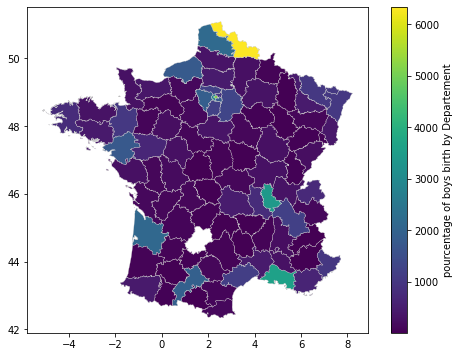

In [ ]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_emma_weight.plot(column="nombre_weight",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "pourcentage of boys birth by Departement"})